## IMPORT PACKAGES 

In [30]:
import nltk
import numpy as np
import csv
#tqdm : 进度条
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split as split
#用于在jupyter 显示图像
%matplotlib inline

In [3]:
#无法下载则去www.nltk.org/nltk_data官网下载后放在相应目录下
#官网用chrome可以下载
nltk.download(['stopwords','punkt','wordnet','averaged_perceptron_tagger'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joker\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## READ DATA 


In [18]:
#Variables

FILE_PATH = './datasets/training-v1/offenseval-training-v1.tsv'

In [13]:
def str_to_label(text_label):
    label = 0
    if text_label == 'OFF':
        label = 1
    return label

In [20]:
#从tsv文档读数据
#输入数据格式：
#id,tweet,label_a,label_b,label_c
#输出data list [tweet1, tweet2,...]
#输出label list [label1, label2, ...]
def get_training_data(FILE_PATH):
    data = []
    labels = []
    with open(FILE_PATH, encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile,delimiter='\t')
        for i,line in enumerate(tqdm(reader,'READING DATA.....')):
            if i is 0:
                #不读第一行（title）
                continue
            label = str_to_label(line[-3])
            data.append(line[1])
            labels.append(label)
    return data, labels
            

In [24]:
all_data, all_labels = get_training_data(FILE_PATH)

READING DATA.....: 13241it [00:00, 212044.47it/s]


In [25]:
print(all_data[:3])
print(all_labels[:3])

['@USER She should ask a few native Americans what their take on this is.', '@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL', 'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT']
[1, 1, 0]


In [27]:
## 为了评估模型性能，需要labeled test data
## 从数据中分出1/10做validation data, 1/10做test data
## 首先shuffle数据
shuffled_data, shuffled_labels = shuffle(all_data, all_labels, random_state=0)

In [28]:
print(shuffled_data[:3])
print(shuffled_labels[:3])

['@USER Good! #Antifa is violent fascism.', "@USER It has been being de-created slowly and stealthily since the CONservatives came to power... Hunt's done a sterling job.", "* Christian Kabasele reveals the secrets behind Watford's perfect start to the Premier League season : Beans are banned at Watford's training ground so Christian Kabasele spills the avocado and quinoa. He is is intelligent.. . URL URL"]
[0, 0, 0]


In [82]:
#split train and test
train_data,test_data,train_labels,test_labels = split(shuffled_data,\
                                                     shuffled_labels,\
                                                     test_size=0.1)

## Data Statics

In [78]:
def get_statics(data,label,datatype,tokenized = False):
    length = len(data)
    off_d = sum(label)
    off = round(off_d/length,4)
    wc = 0
    vocab = set()
    
    for t in data:
        ## to be modified for efficiency
        if tokenized:
            t_list = t
        else:
            t_list = t.split(' ')
        wc += len(t_list)
        for w in t_list:
            vocab.add(w)
    a_wc = round(wc/length,2)
    
    
    print('--------'+'For %s set'%(datatype)+'-------')
    print('Length: %d'%(length))
    print('with offensive tweets %d,%.4f'%(off_d,off))
    print('average length: %.2f'%(a_wc))
    print('vocab size: %d'%(len(vocab)))
    print()

In [83]:
get_statics(train_data,train_labels,'training')
get_statics(test_data,test_labels,'testing')


--------For training set-------
Length: 11916
with offensive tweets 3965,0.3327
average length: 22.73
vocab size: 36605

--------For testing set-------
Length: 1324
with offensive tweets 435,0.3285
average length: 22.62
vocab size: 7644



## Pre-processing

In [46]:
##接下来对数据做预处理
##问题：
##1. 不能完全凭空格做好分词，有相连的标点、专有名词等的干扰
##2. 口语化，不规范用词
##3. 待补充

In [90]:
train_data[:3]

['@USER she is',
 '@USER @USER @USER @USER @USER Thank you mama cookie she is my long distance cousin. She will treat you well.',
 '@USER @USER @USER @USER @USER @USER They can’t. His a sheep. Just follow along with fake news and put everyone who can think for themselves as KKK. Antifa wannabes']

### 分词

In [214]:
## 1. 分词
def tokenize(data):
    from nltk import word_tokenize
    #把emoji转成文字
    import emoji
    seg_data = []
    for t in tqdm(data,'Tokenization...'):
        seg_data.append(word_tokenize(emoji.demojize(t.lower())))
    return seg_data

In [215]:
seg_train_data = tokenize(train_data)

Tokenization...: 100%|█████████████████████████████████████████████████████████| 11916/11916 [00:08<00:00, 1474.89it/s]


In [216]:
seg_test_data = tokenize(test_data)

Tokenization...: 100%|███████████████████████████████████████████████████████████| 1324/1324 [00:00<00:00, 1493.44it/s]


In [217]:
get_statics(seg_train_data, train_labels,'tokenized training data',True)

get_statics(seg_test_data, test_labels,'tokenized test data',True)

--------For tokenized training data set-------
Length: 11916
with offensive tweets 3965,0.3327
average length: 28.93
vocab size: 20268

--------For tokenized test data set-------
Length: 1324
with offensive tweets 435,0.3285
average length: 28.98
vocab size: 5346



In [100]:
seg_train_data[0]

['@', 'user', 'she', 'is']

### 去停用词

In [227]:
def remove_sw(data):
    from nltk.corpus import stopwords
    import re
    
    
    stop = set(stopwords.words('english'))
    noise = ['user','url','amp',] #除去@User等自定义的停用词
    removed_sw = []
    for t in tqdm((data),'Removing Stopwords.....'):
        
        removed_sw.append([w for w in t if w not in stop and \
                           not re.match(r"[^a-zA-Z\d\s]+", w) and\
                           w not in noise])
    return removed_sw

In [228]:
clean_train_data = remove_sw(seg_train_data)
get_statics(clean_train_data,train_labels,'cleaned training data',True)

Removing Stopwords.....: 100%|████████████████████████████████████████████████| 11916/11916 [00:00<00:00, 43426.37it/s]


--------For cleaned training data set-------
Length: 11916
with offensive tweets 3965,0.3327
average length: 10.46
vocab size: 19328



In [229]:
clean_train_data[:3]

[[],
 ['thank', 'mama', 'cookie', 'long', 'distance', 'cousin', 'treat', 'well'],
 ['sheep',
  'follow',
  'along',
  'fake',
  'news',
  'put',
  'everyone',
  'think',
  'kkk',
  'antifa',
  'wannabes']]

In [230]:
#删掉为空的句子
def further_clean(data,labels):
    f_clean_data =[]
    f_clean_labels = []
    for i in range(len(data)):
        t = data[i]
        l = labels[i]
        if len(t) >= 1:
            f_clean_data.append(t)
            f_clean_labels.append(l)
    return f_clean_data, f_clean_labels
f_clean_train_data,f_clean_train_labels = further_clean(clean_train_data,train_labels)
#f_clean_train_data = [t for t in clean_train_data if len(t)>1]
get_statics(f_clean_train_data,f_clean_train_labels,'cleaned training data',True)

--------For cleaned training data set-------
Length: 11869
with offensive tweets 3964,0.3340
average length: 10.50
vocab size: 19328



## 把单词归一化（变形的单词回归原型）

In [231]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
def get_pos(word):
    tag = pos_tag([word])[0][1]
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatize(data):

    
    wnl = WordNetLemmatizer()
    lemma_data = []
    for t in tqdm(data,'Lemmatization...'):
        this_lemma = [wnl.lemmatize(w, get_pos(w)) for w in t]
        lemma_data.append(this_lemma)
    return lemma_data
    

In [232]:
lemma_train_data = lemmatize(f_clean_train_data)

Lemmatization...: 100%|█████████████████████████████████████████████████████████| 11869/11869 [00:54<00:00, 217.72it/s]


In [236]:
get_statics(lemma_train_data,train_labels,'lemmad data', True)

--------For lemmad data set-------
Length: 11869
with offensive tweets 3965,0.3341
average length: 10.50
vocab size: 16157



In [237]:
lemma_train_data[:3]

[['thank', 'mama', 'cookie', 'long', 'distance', 'cousin', 'treat', 'well'],
 ['sheep',
  'follow',
  'along',
  'fake',
  'news',
  'put',
  'everyone',
  'think',
  'kkk',
  'antifa',
  'wannabe'],
 ['cnn',
  'others',
  'involve',
  'conspiracy',
  'theory',
  'propaganda',
  'protect',
  'antifa',
  'guess',
  '2013',
  'bill',
  '2016',
  'bill',
  'propaganda',
  'protect',
  'state',
  'medium']]

In [238]:
    def word_cloud(data,name,labels=None,filter=None):
        if not isinstance(data[0],list):
            raise Exception('Data must be tokenized before using word cloud.')
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud
        filters = ['NON','OFF']
        if not filter:
            plot_data = [w for i,tweet in enumerate(data) for w in tweet]
        else:
            if not labels:
                raise Exception('Labels must be provided for filtering text.')
            filter = filters.index(filter)
            plot_data = [w for i,tweet in enumerate(data) for w in tweet if labels[i]==filter]
        all_words = ' '.join(plot_data)
        wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(all_words)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.savefig(name+'wordcloud.png')
        plt.show()

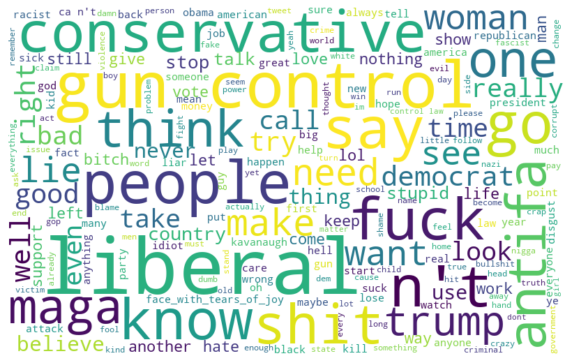

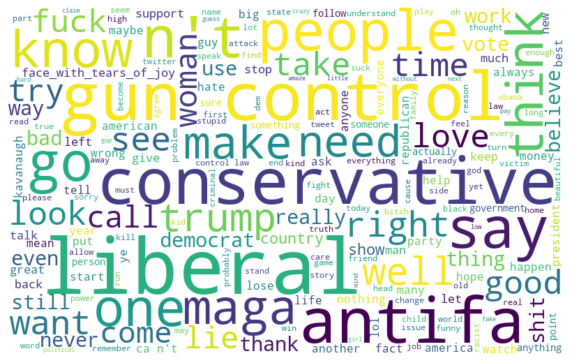

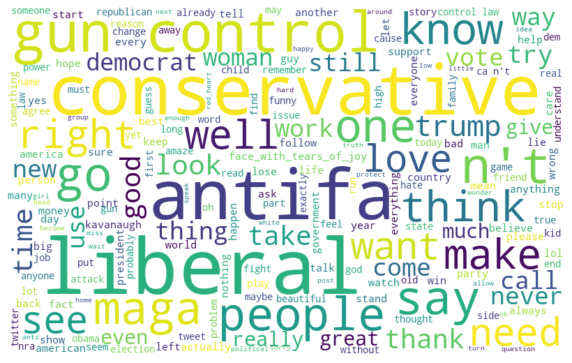

In [239]:
word_cloud(lemma_train_data,name='off',labels=f_clean_train_labels,filter='OFF')
word_cloud(lemma_train_data,name='overall')
word_cloud(lemma_train_data,name='nonoff',labels=f_clean_train_labels,filter='NON')

In [153]:
len(lemma_train_data)


11859

In [154]:
len(f_clean_train_labels)

11859

## 将所有预处理过程串联起来

In [240]:
def pre_process(data,label):
    get_statics(data,label,'oringin data',False)
    s = tokenize(data)
    r = remove_sw(s)
    r,labels = further_clean(r,label)
    l = lemmatize(r)
    
    get_statics(l,labels,'final data',True)
    return l,labels

In [241]:

done_train_data, done_train_lable = pre_process(train_data,train_labels)

--------For oringin data set-------
Length: 11916
with offensive tweets 3965,0.3327
average length: 22.73
vocab size: 36605



Lemmatization...: 100%|█████████████████████████████████████████████████████████| 11869/11869 [00:53<00:00, 221.28it/s]


--------For final data set-------
Length: 11869
with offensive tweets 3964,0.3340
average length: 10.50
vocab size: 16157



# Word Embedding

In [164]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import numpy as np
#from gensim.models import Word2Vec,FastText,KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim.downloader as api
from tqdm import tqdm
from os import listdir

In [176]:
def tfidf(data,vectorizer):
    if vectorizer == 0:
        vectorizer =  TfidfVectorizer(binary=False,decode_error='ignore')
        untokenized_data =[' '.join(tweet) for tweet in data]
        vectorizer = vectorizer.fit(untokenized_data)
    untokenized_data =[' '.join(tweet) for tweet in data]    
    vectors = vectorizer.transform(untokenized_data).toarray()
    return vectors,vectorizer
    

In [209]:
train_vec, tfidf_vectorizer= tfidf(done_train_data, 0)

In [210]:
#每一行是一句话
#vocabsize是
train_vec.shape

(11873, 15105)

In [211]:
len(tfidf_vectorizer.vocabulary_)

15105

In [213]:
print(tfidf_vectorizer.vocabulary_)

{'thank': 13274, 'mama': 8300, 'cookie': 3151, 'long': 8082, 'distance': 4109, 'cousin': 3252, 'treat': 13679, 'well': 14613, 'sheep': 11988, 'follow': 5363, 'along': 716, 'fake': 5010, 'news': 9166, 'put': 10755, 'everyone': 4806, 'think': 13371, 'kkk': 7601, 'antifa': 893, 'wannabe': 14497, 'cnn': 2778, 'others': 9676, 'involve': 7131, 'conspiracy': 3066, 'theory': 13329, 'propaganda': 10601, 'protect': 10630, 'guess': 6056, '2013': 134, 'bill': 1656, '2016': 137, 'state': 12675, 'medium': 8525, 'url': 14154, '100': 9, 'right': 11362, 'successful': 12875, 'prosecution': 10622, 'send': 11851, 'message': 8600, 'say': 11676, 'inability': 6859, 'voter': 14405, 'take': 13080, 'photo': 10104, 'evidence': 4814, 'party': 9878, 'vote': 14393, 'reduces': 11029, 'likelihood': 7964, 'buying': 2195, 'waste': 14530, 'money': 8833, 'new': 9161, 'approach': 968, 'zero': 15082, 'guarantee': 6051, 'go': 5820, 'destroy': 3854, 'america': 775, 'like': 7963, 'do': 4157, 'many': 8354, 'business': 2175, 'c

In [190]:
a = [[1,2],['a',3]]
b = np.array(a)

In [191]:
b = np.reshape(b,(-1))

In [196]:
set(b)


{'1', '2', '3', 'a'}

In [201]:
print('dreams.🧡')

dreams.🧡


In [202]:
a =' dreams.🧡'
a

' dreams.🧡'

In [203]:
import emoji
print(emoji.demojize(a))

 dreams.:orange_heart:
